<a href="https://colab.research.google.com/github/tbazzi/Data-Science---Fullstack-Bootcamp/blob/master/S5_ProjetUber_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import seaborn as sns
import pandas as pd
import numpy as np
#import matplotlib as plt
import matplotlib.pyplot as plt

In [81]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [93]:
df = pd.read_csv("/content/drive/My Drive/df_preprocessed.csv") 
df=df.drop("Unnamed: 0", axis=1)
df = df.drop("Key", axis = 1)
df.head()

Lat      Lon    Base  hour  Day
0  40.7586 -73.9706  B02512     0    1
1  40.7605 -73.9994  B02512     0    1
2  40.7320 -73.9999  B02512     0    1
3  40.7635 -73.9793  B02512     0    1
4  40.7204 -74.0047  B02512     0    1

In [0]:
def st(x):
  return str(x)[:-1]

In [66]:
#df.Lat = df.Lat.apply(lambda x: st(x))
#df.Lon = df.Lon.apply(lambda x: st(x))
df_groupedLL = df
df_groupedLL = df_groupedLL.groupby(["Lat", "Lon", "Base", "hour", "Day"]).size().reset_index(name='count')
df_groupedLL = df_groupedLL.drop("count", axis = 1)
df_groupedLL.head()

Lat      Lon    Base  hour  Day
0  39.7214 -74.2446  B02617    14    5
1  39.8416 -74.1512  B02617    22    5
2  39.9055 -74.0791  B02512    22    5
3  39.9374 -74.0722  B02512     1    6
4  39.9384 -74.0742  B02617     1    6

In [68]:

import folium
l = []
for item in df_groupedLL.values:
  l.append(tuple([float(item[0]), float(item[1])]))

latlon = l[:1000] #[ (51.249443914705175, -0.13878830247011467), (51.249443914705175, -0.13878830247011467), (51.249768239976866, -2.8610415615063034)]
mapit = folium.Map( location=[40.7, -74.0], zoom_start=6 )
for coord in latlon:
    folium.Marker( location=[ coord[0], coord[1] ]).add_to( mapit )
    
mapit

In [0]:
df.hour = df.hour.apply(lambda x: 1 if 0<=x<=3 
                                  else 2 if 4<=x<=6
                                  else 3 if 7<=x<=9
                                  else 4 if 10<=x<=12
                                  else 5 if 13<=x<=15
                                  else 6 if 16<=x<=18
                                  else 7 if 19<=x<=21
                                  else 8 if 22<=x else 0)

In [0]:
from sklearn.preprocessing import StandardScaler

X = pd.get_dummies(df)
sc= StandardScaler()
X = pd.DataFrame(sc.fit_transform(X), columns=X.columns)
X1 = X

In [99]:
X.head()

Lat       Lon      hour  ...  Base_B02617  Base_B02682  Base_B02764
0  0.479867  0.029877 -2.083638  ...      -0.7989    -0.572948    -0.104433
1  0.526722 -0.461091 -2.083638  ...      -0.7989    -0.572948    -0.104433
2 -0.176101 -0.469614 -2.083638  ...      -0.7989    -0.572948    -0.104433
3  0.600704 -0.118436 -2.083638  ...      -0.7989    -0.572948    -0.104433
4 -0.462163 -0.551442 -2.083638  ...      -0.7989    -0.572948    -0.104433

[5 rows x 9 columns]

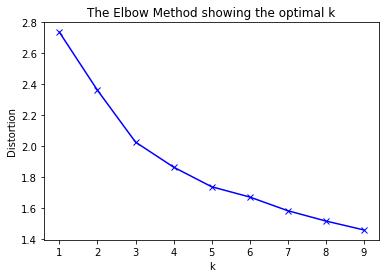

In [100]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
X = X.sample(frac= 0.1, replace=True, random_state=1).values
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)#.fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

For n_clusters = 5 The average silhouette_score is : 0.40278673835773193
For n_clusters = 6 The average silhouette_score is : 0.33115296224678065
For n_clusters = 7 The average silhouette_score is : 0.3383242342733106


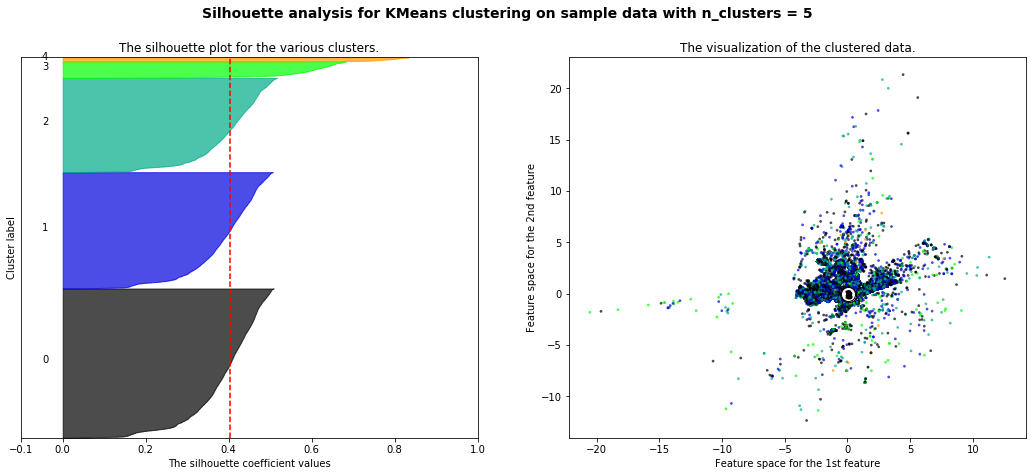

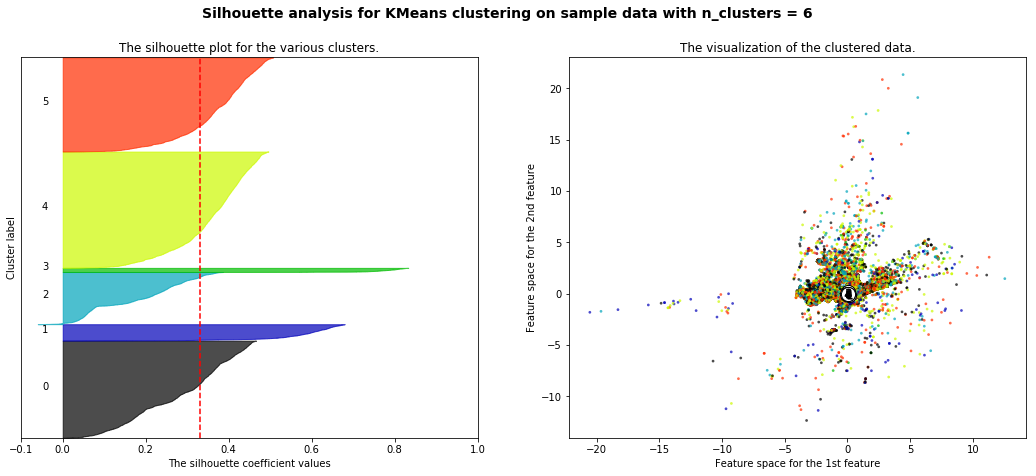

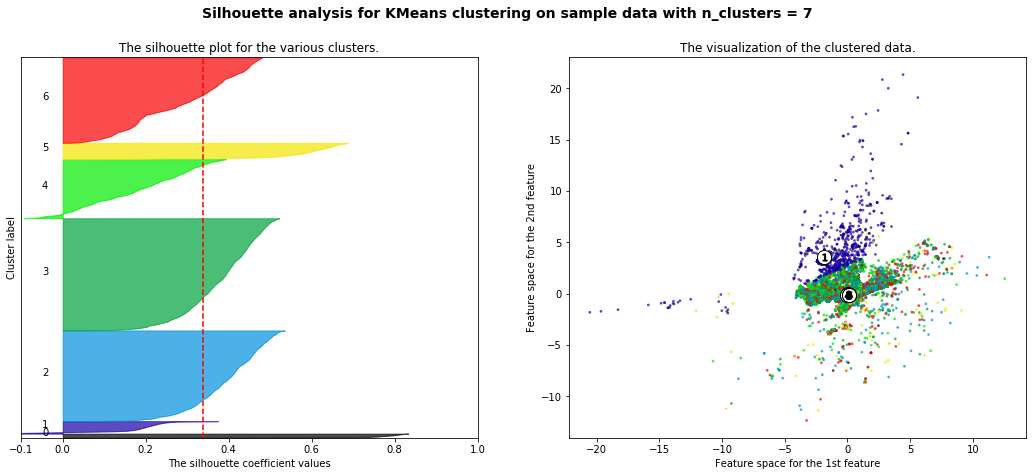

In [101]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
#X, y = make_blobs(n_samples=500,
#                  n_features=2,
#                  centers=4,
#                  cluster_std=1,
#                  center_box=(-10.0, 10.0),
#                  shuffle=True,
#                  random_state=1)  # For reproducibility

range_n_clusters = [5, 6, 7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [0]:
from sklearn.cluster import KMeans
X = X1
kmeans = KMeans(n_clusters=5, init="k-means++", max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X.values) 

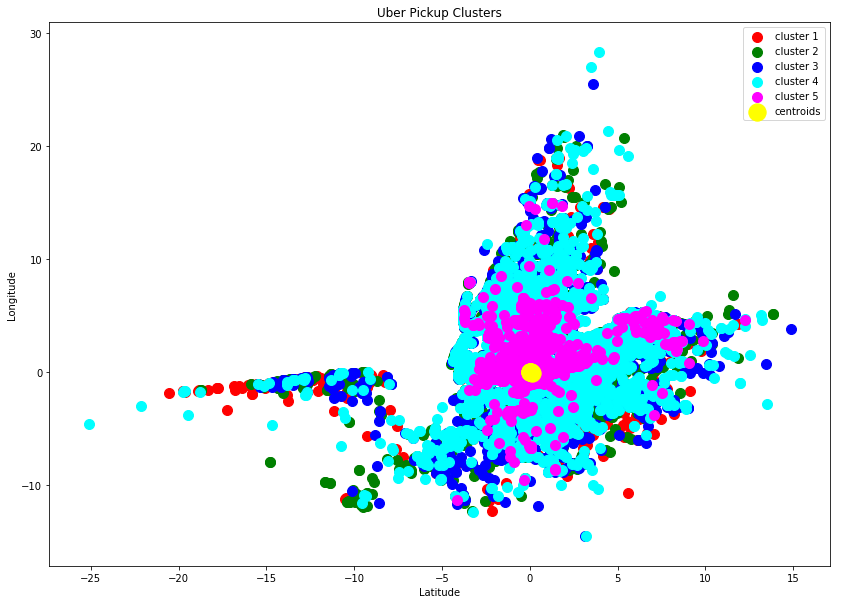

In [110]:
# Visualizing the clusters on Long + Lat
plt.subplots(figsize=(14, 10))
plt.scatter(X.iloc[:, 0][y_kmeans == 0], X.iloc[:, 1][y_kmeans == 0], s = 100, c = 'red', label = 'cluster 1')
plt.scatter(X.iloc[:, 0][y_kmeans == 1], X.iloc[:, 1][y_kmeans == 1], s = 100, c = 'green', label = 'cluster 2')
plt.scatter(X.iloc[:, 0][y_kmeans == 2], X.iloc[:, 1][y_kmeans == 2], s = 100, c = 'blue', label = 'cluster 3')
plt.scatter(X.iloc[:, 0][y_kmeans == 3], X.iloc[:, 1][y_kmeans == 3], s = 100, c = 'cyan', label = 'cluster 4')
plt.scatter(X.iloc[:, 0][y_kmeans == 4], X.iloc[:, 1][y_kmeans == 4], s = 100, c = 'magenta', label = 'cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'centroids')
plt.title('Uber Pickup Clusters')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.show()

In [128]:
X = sc.inverse_transform(X)


array([[ 40.7586, -73.9706,   1.    , ...,   0.    ,   0.    ,   0.    ],
       [ 40.7605, -73.9994,   1.    , ...,   0.    ,   0.    ,   0.    ],
       [ 40.732 , -73.9999,   1.    , ...,   0.    ,   0.    ,   0.    ],
       ...,
       [ 40.677 , -73.9515,   8.    , ...,   0.    ,   0.    ,   1.    ],
       [ 40.7225, -74.0038,   8.    , ...,   0.    ,   0.    ,   1.    ],
       [ 40.7199, -73.9884,   8.    , ...,   0.    ,   0.    ,   1.    ]])

In [129]:

X = pd.DataFrame(X, columns=["Lat","Lon","hour" ,"Day","Base_B02512","Base_B02598","Base_B02617","Base_B02682","Base_B02764"])
X['clust'] = kmeans.labels_
X.head()


Lat      Lon  hour  Day  ...  Base_B02617  Base_B02682  Base_B02764  clust
0  40.7586 -73.9706   1.0  1.0  ...          0.0          0.0          0.0      0
1  40.7605 -73.9994   1.0  1.0  ...          0.0          0.0          0.0      0
2  40.7320 -73.9999   1.0  1.0  ...          0.0          0.0          0.0      0
3  40.7635 -73.9793   1.0  1.0  ...          0.0          0.0          0.0      0
4  40.7204 -74.0047   1.0  1.0  ...          0.0          0.0          0.0      0

[5 rows x 10 columns]

In [0]:
X[X['clust'] == 3]

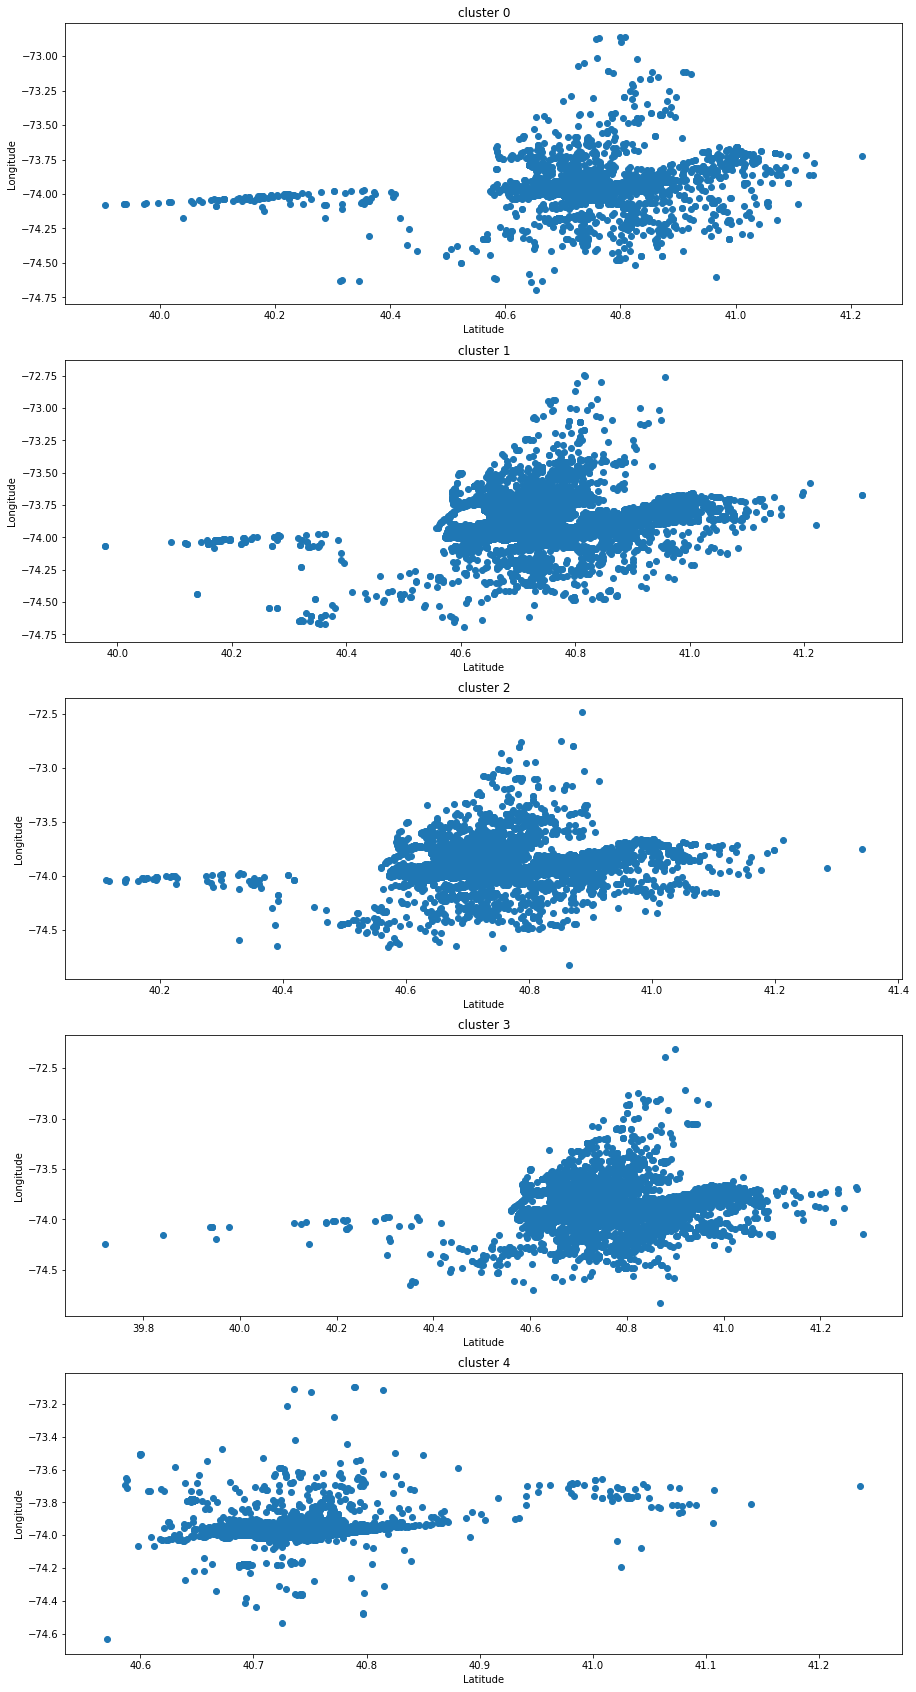

In [150]:
# Visualizing the clusters on Long + Lat
fig, axs = plt.subplots(5, 1,figsize=(15,30))
for clus in range(5):
  axs[clus].scatter(X[X['clust'] == clus].Lat, X[X['clust'] == clus].Lon)
  axs[clus].set_title('cluster '+str(clus))
  axs[clus].set_xlabel('Latitude')
  axs[clus].set_ylabel('Longitude')
plt.show()

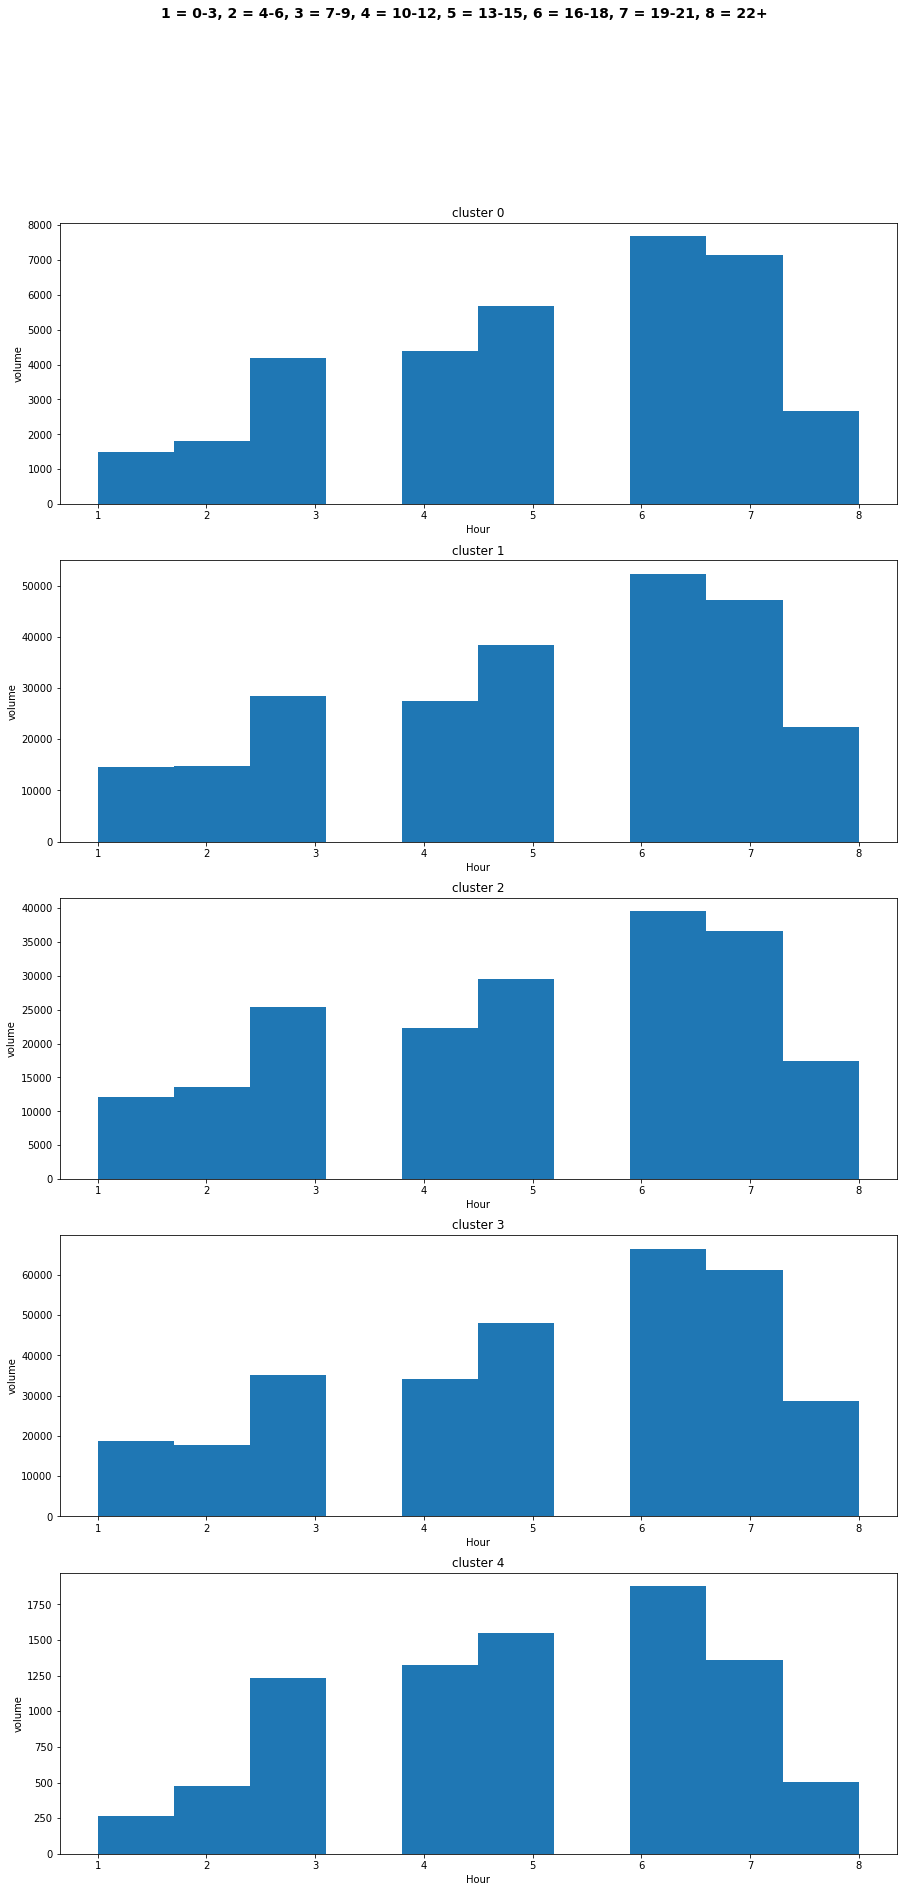

In [158]:
# Visualizing the clusters
fig, axs = plt.subplots(5, 1,figsize=(15,30))
plt.suptitle("1 = 0-3, 2 = 4-6, 3 = 7-9, 4 = 10-12, 5 = 13-15, 6 = 16-18, 7 = 19-21, 8 = 22+",fontsize=14, fontweight='bold')
for clus in range(5):
  axs[clus].hist(X[X['clust'] == clus].hour)
  axs[clus].set_title('cluster '+str(clus))
  axs[clus].set_xlabel('Hour')
  axs[clus].set_ylabel('volume')

plt.show()

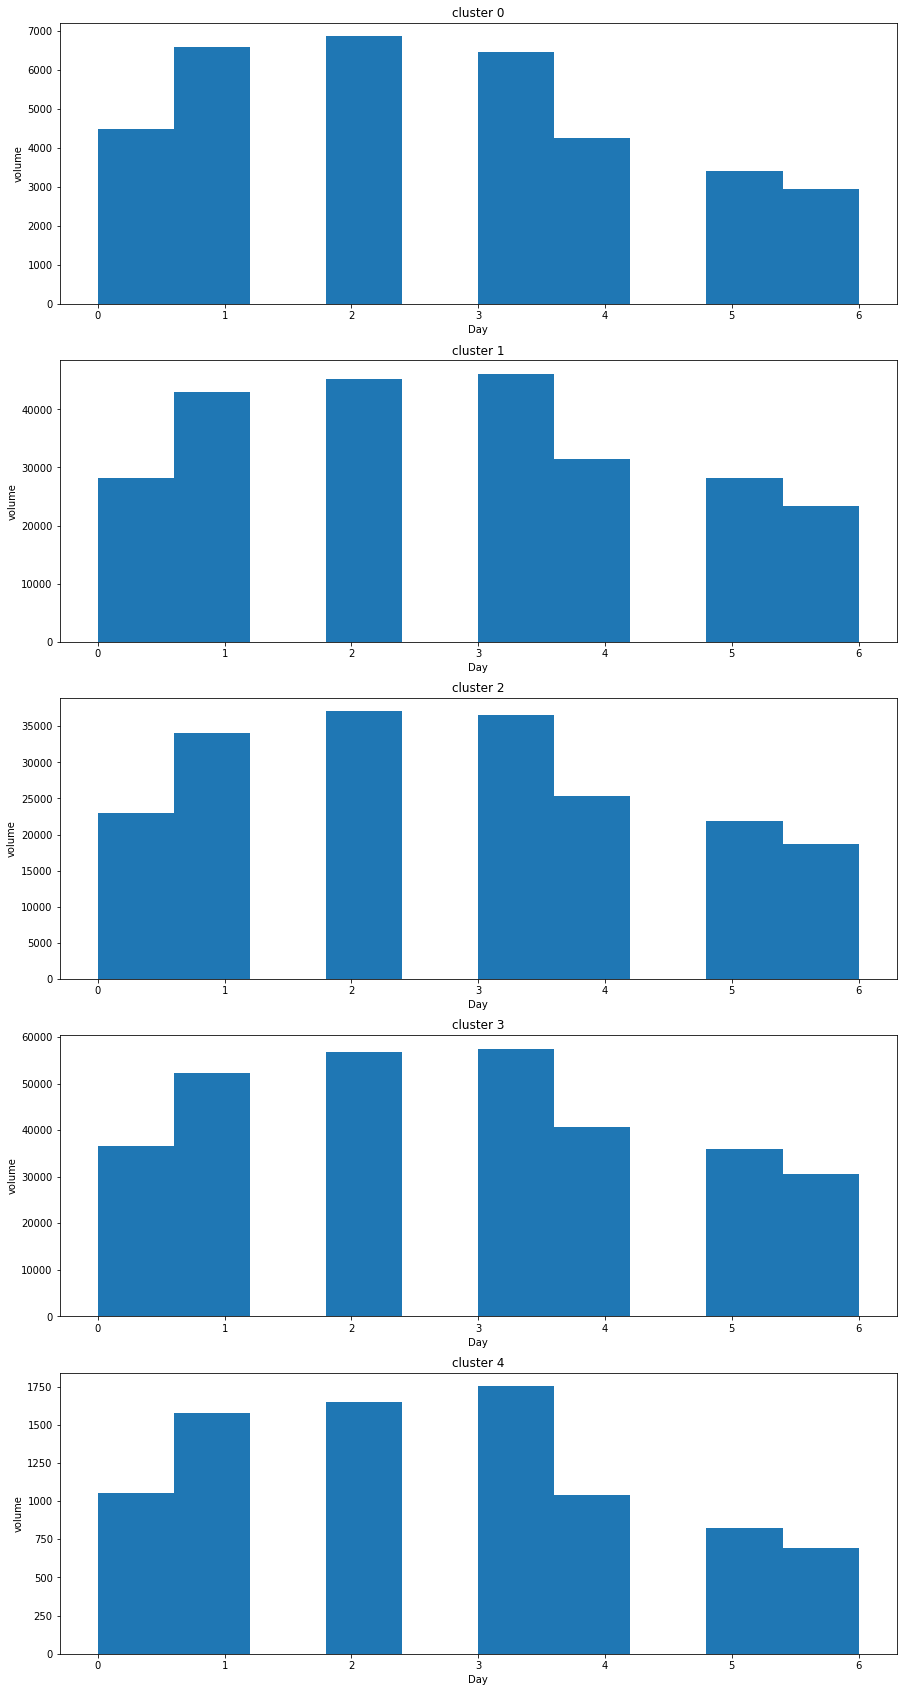

In [159]:
# Visualizing the clusters
fig, axs = plt.subplots(5, 1,figsize=(15,30))
#plt.suptitle("1 = 0-3, 2 = 4-6, 3 = 7-9, 4 = 10-12, 5 = 13-15, 6 = 16-18, 7 = 19-21, 8 = 22+",fontsize=14, fontweight='bold')
for clus in range(5):
  axs[clus].hist(X[X['clust'] == clus].Day)
  axs[clus].set_title('cluster '+str(clus))
  axs[clus].set_xlabel('Day')
  axs[clus].set_ylabel('volume')

plt.show()

In [0]:
# Visualizing the clusters
fig, axs = plt.subplots(5, 1,figsize=(15,30))
plt.suptitle("1 = 0-3, 2 = 4-6, 3 = 7-9, 4 = 10-12, 5 = 13-15, 6 = 16-18, 7 = 19-21, 8 = 22+",fontsize=14, fontweight='bold')
for clus in range(5):
  axs[clus].hist(X[X['clust'] == clus].hour)
  axs[clus].set_title('cluster '+str(clus))
  axs[clus].set_xlabel('Hour')
  axs[clus].set_ylabel('volume')

plt.show()

In [164]:
l = []
for item in X[X['clust'] ==0].values:
  l.append(tuple([float(item[0]), float(item[1])]))

latlon = l[:1000] 
mapit = folium.Map( location=[40.7, -74.0], zoom_start=6 )
for coord in latlon:
    folium.Marker( location=[ coord[0], coord[1] ]).add_to( mapit )
    
mapit


In [165]:
l = []
for item in X[X['clust'] ==1].values:
  l.append(tuple([float(item[0]), float(item[1])]))

latlon = l[:1000] 
mapit = folium.Map( location=[40.7, -74.0], zoom_start=6 )
for coord in latlon:
    folium.Marker( location=[ coord[0], coord[1] ]).add_to( mapit )
    
mapit


In [168]:
l = []
for item in X[X['clust'] ==2].values:
  l.append(tuple([float(item[0]), float(item[1])]))

latlon = l[:1000] 
mapit = folium.Map( location=[40.7, -74.0], zoom_start=6 )
for coord in latlon:
    folium.Marker( location=[ coord[0], coord[1] ]).add_to( mapit )
    
mapit


In [169]:
l = []
for item in X[X['clust'] ==3].values:
  l.append(tuple([float(item[0]), float(item[1])]))

latlon = l[:1000] 
mapit = folium.Map( location=[40.7, -74.0], zoom_start=6 )
for coord in latlon:
    folium.Marker( location=[ coord[0], coord[1] ]).add_to( mapit )
    
mapit

In [172]:
l = []
for item in X[X['clust'] ==4].values:
  l.append(tuple([float(item[0]), float(item[1])]))

latlon = l 
mapit = folium.Map( location=[40.7, -74.0], zoom_start=6 )
for coord in latlon:
    folium.Marker( location=[ coord[0], coord[1] ]).add_to( mapit )
    
mapit

In [180]:
from sklearn.preprocessing import StandardScaler
X1 = X
X = X.iloc[:, :4]
X = pd.get_dummies(X)
sc= StandardScaler()
X = pd.DataFrame(sc.fit_transform(X), columns=X.columns)
X.head()

Lat       Lon      hour       Day
0  0.479867  0.029877 -2.083638 -0.966966
1  0.526722 -0.461091 -2.083638 -0.966966
2 -0.176101 -0.469614 -2.083638 -0.966966
3  0.600704 -0.118436 -2.083638 -0.966966
4 -0.462163 -0.551442 -2.083638 -0.966966

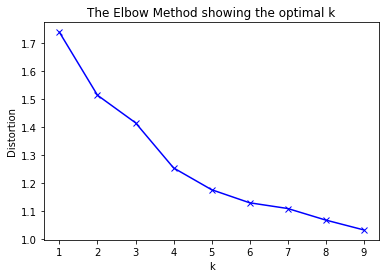

In [181]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
X = X.sample(frac= 0.1, replace=True, random_state=1).values
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)#.fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

For n_clusters = 7 The average silhouette_score is : 0.25539657657415243
For n_clusters = 8 The average silhouette_score is : 0.2640750505853628
For n_clusters = 9 The average silhouette_score is : 0.22560147933327065
For n_clusters = 10 The average silhouette_score is : 0.22829376609050878
For n_clusters = 11 The average silhouette_score is : 0.2213256601807316
For n_clusters = 12 The average silhouette_score is : 0.22336964042584861
For n_clusters = 13 The average silhouette_score is : 0.2180499967231918
For n_clusters = 14 The average silhouette_score is : 0.2206948178682908


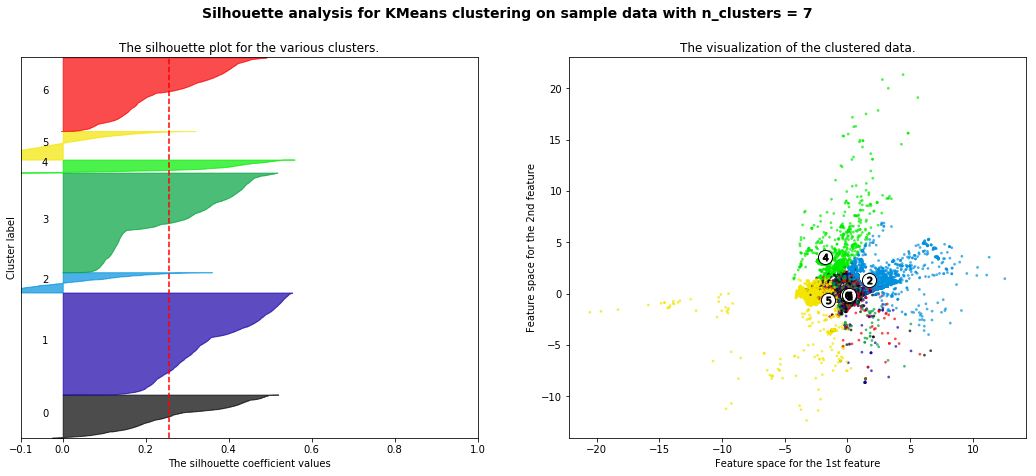

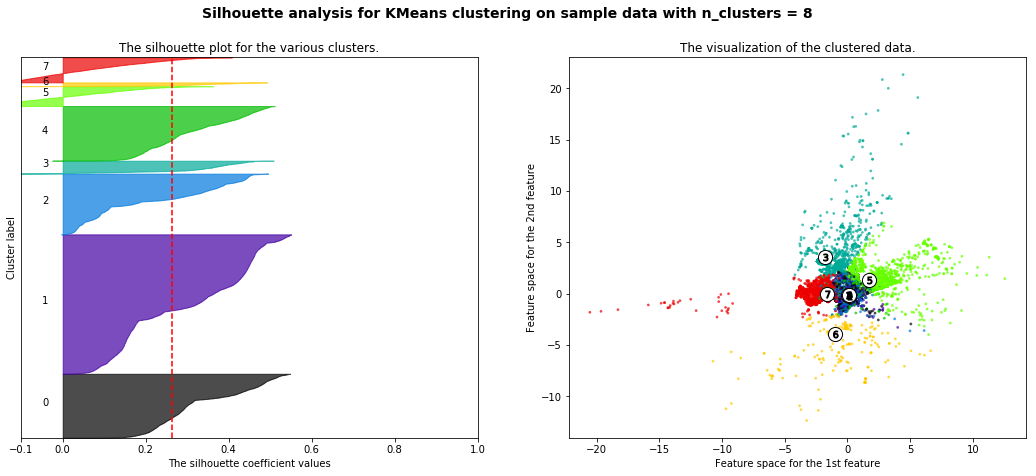

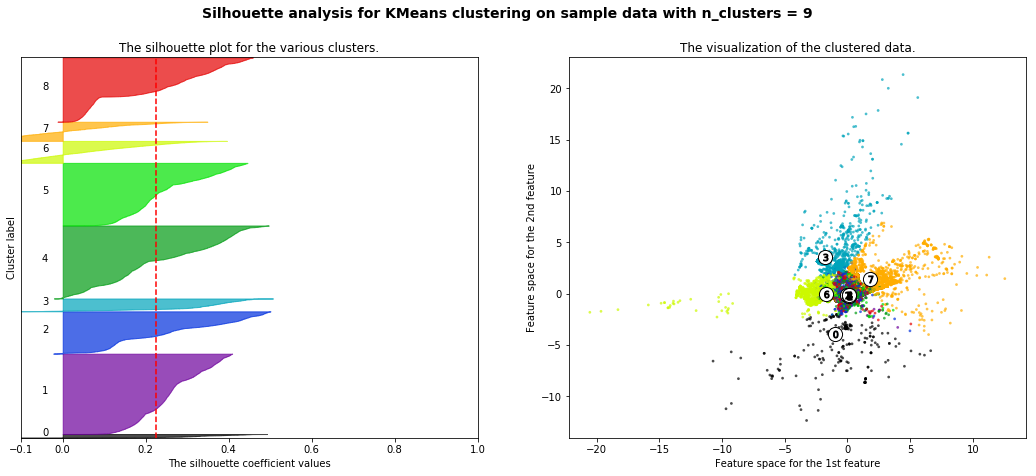

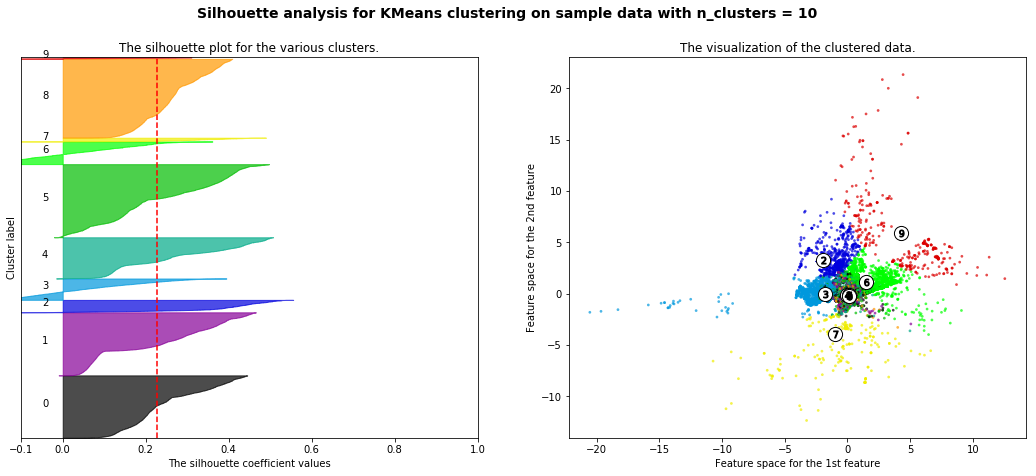

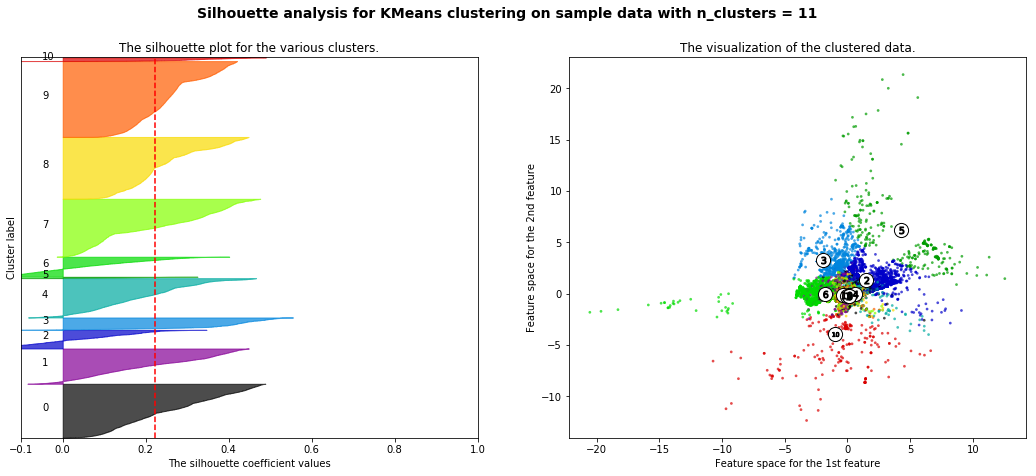

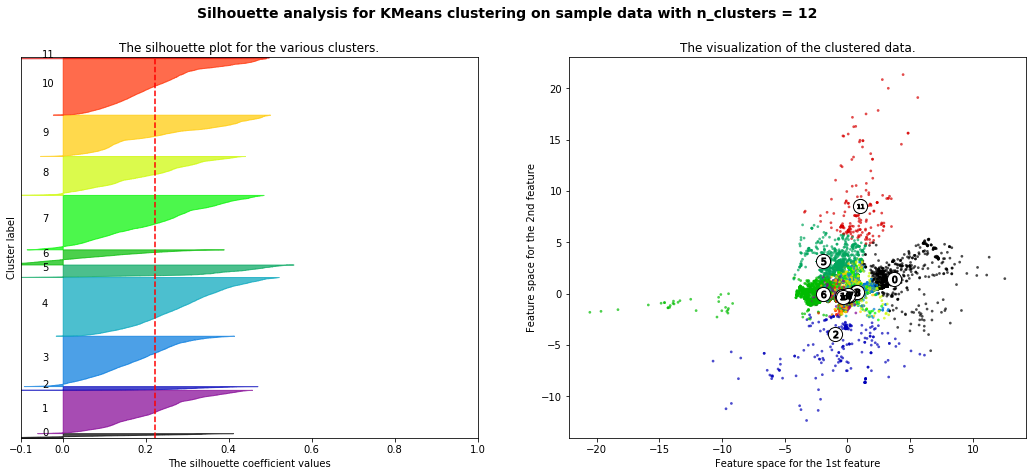

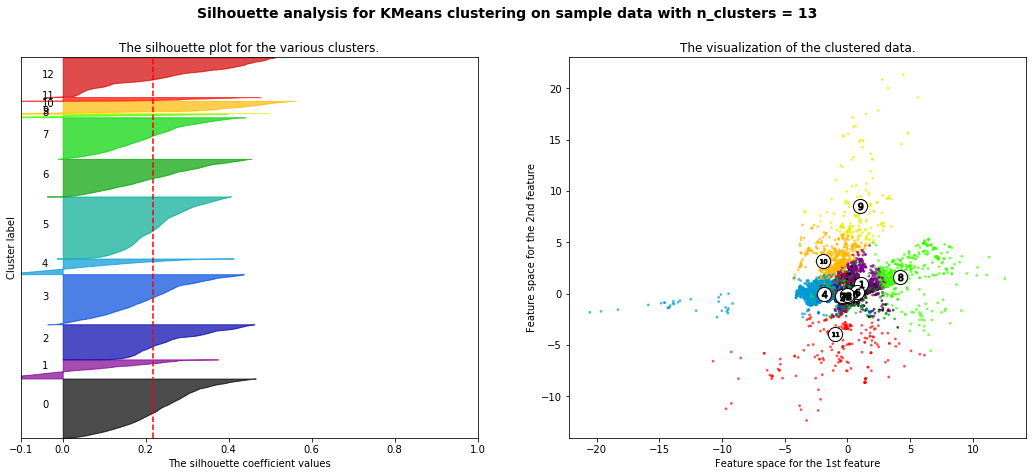

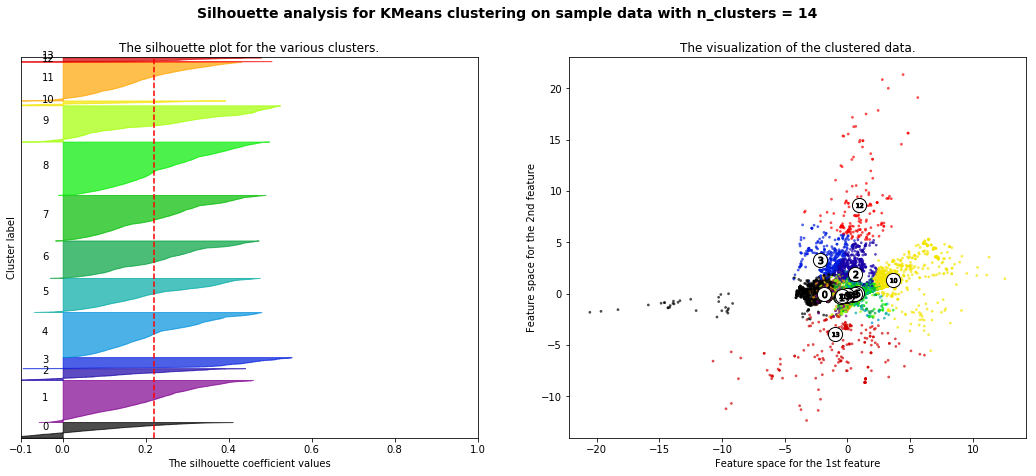

In [183]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
#X, y = make_blobs(n_samples=500,
#                  n_features=2,
#                  centers=4,
#                  cluster_std=1,
#                  center_box=(-10.0, 10.0),
#                  shuffle=True,
#                  random_state=1)  # For reproducibility

range_n_clusters = range(7, 15)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [184]:
X1.head()

Lat      Lon  hour  Day  ...  Base_B02617  Base_B02682  Base_B02764  clust
0  40.7586 -73.9706   1.0  1.0  ...          0.0          0.0          0.0      0
1  40.7605 -73.9994   1.0  1.0  ...          0.0          0.0          0.0      0
2  40.7320 -73.9999   1.0  1.0  ...          0.0          0.0          0.0      0
3  40.7635 -73.9793   1.0  1.0  ...          0.0          0.0          0.0      0
4  40.7204 -74.0047   1.0  1.0  ...          0.0          0.0          0.0      0

[5 rows x 10 columns]

In [185]:
X = X1
X = X.iloc[:, :4]
X = pd.get_dummies(X)
sc= StandardScaler()
X = pd.DataFrame(sc.fit_transform(X), columns=X.columns)
X.head()

Lat       Lon      hour       Day
0  0.479867  0.029877 -2.083638 -0.966966
1  0.526722 -0.461091 -2.083638 -0.966966
2 -0.176101 -0.469614 -2.083638 -0.966966
3  0.600704 -0.118436 -2.083638 -0.966966
4 -0.462163 -0.551442 -2.083638 -0.966966

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, init="k-means++", max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X.values)

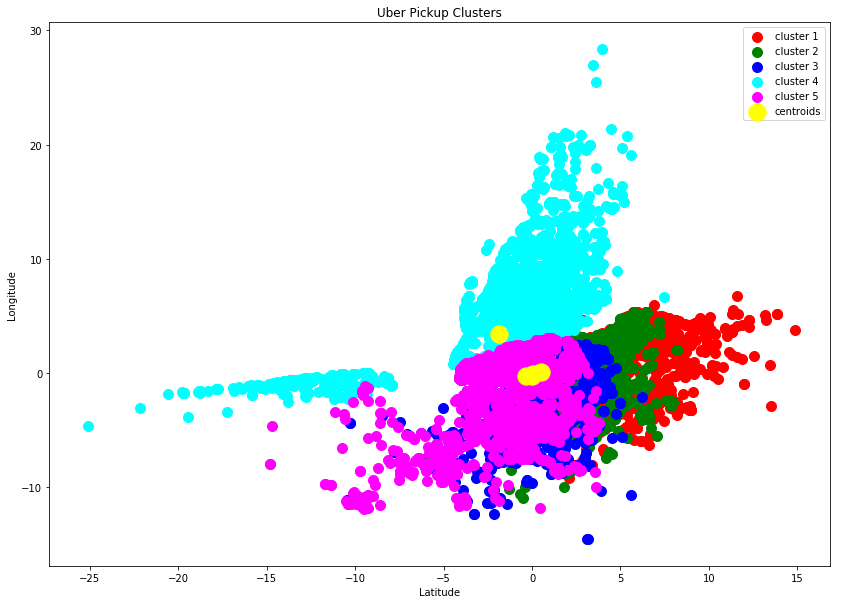

In [187]:
# Visualizing the clusters on Long + Lat
plt.subplots(figsize=(14, 10))
plt.scatter(X.iloc[:, 0][y_kmeans == 0], X.iloc[:, 1][y_kmeans == 0], s = 100, c = 'red', label = 'cluster 1')
plt.scatter(X.iloc[:, 0][y_kmeans == 1], X.iloc[:, 1][y_kmeans == 1], s = 100, c = 'green', label = 'cluster 2')
plt.scatter(X.iloc[:, 0][y_kmeans == 2], X.iloc[:, 1][y_kmeans == 2], s = 100, c = 'blue', label = 'cluster 3')
plt.scatter(X.iloc[:, 0][y_kmeans == 3], X.iloc[:, 1][y_kmeans == 3], s = 100, c = 'cyan', label = 'cluster 4')
plt.scatter(X.iloc[:, 0][y_kmeans == 4], X.iloc[:, 1][y_kmeans == 4], s = 100, c = 'magenta', label = 'cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'centroids')
plt.title('Uber Pickup Clusters')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.show()

In [0]:
X = sc.inverse_transform(X)
X = pd.DataFrame(X, columns=["Lat","Lon","hour" ,"Day"])


In [192]:
X['clust'] = kmeans.labels_
X.head()

Lat      Lon  hour  Day  clust
0  40.7586 -73.9706   1.0  1.0      0
1  40.7605 -73.9994   1.0  1.0      0
2  40.7320 -73.9999   1.0  1.0      0
3  40.7635 -73.9793   1.0  1.0      0
4  40.7204 -74.0047   1.0  1.0      0

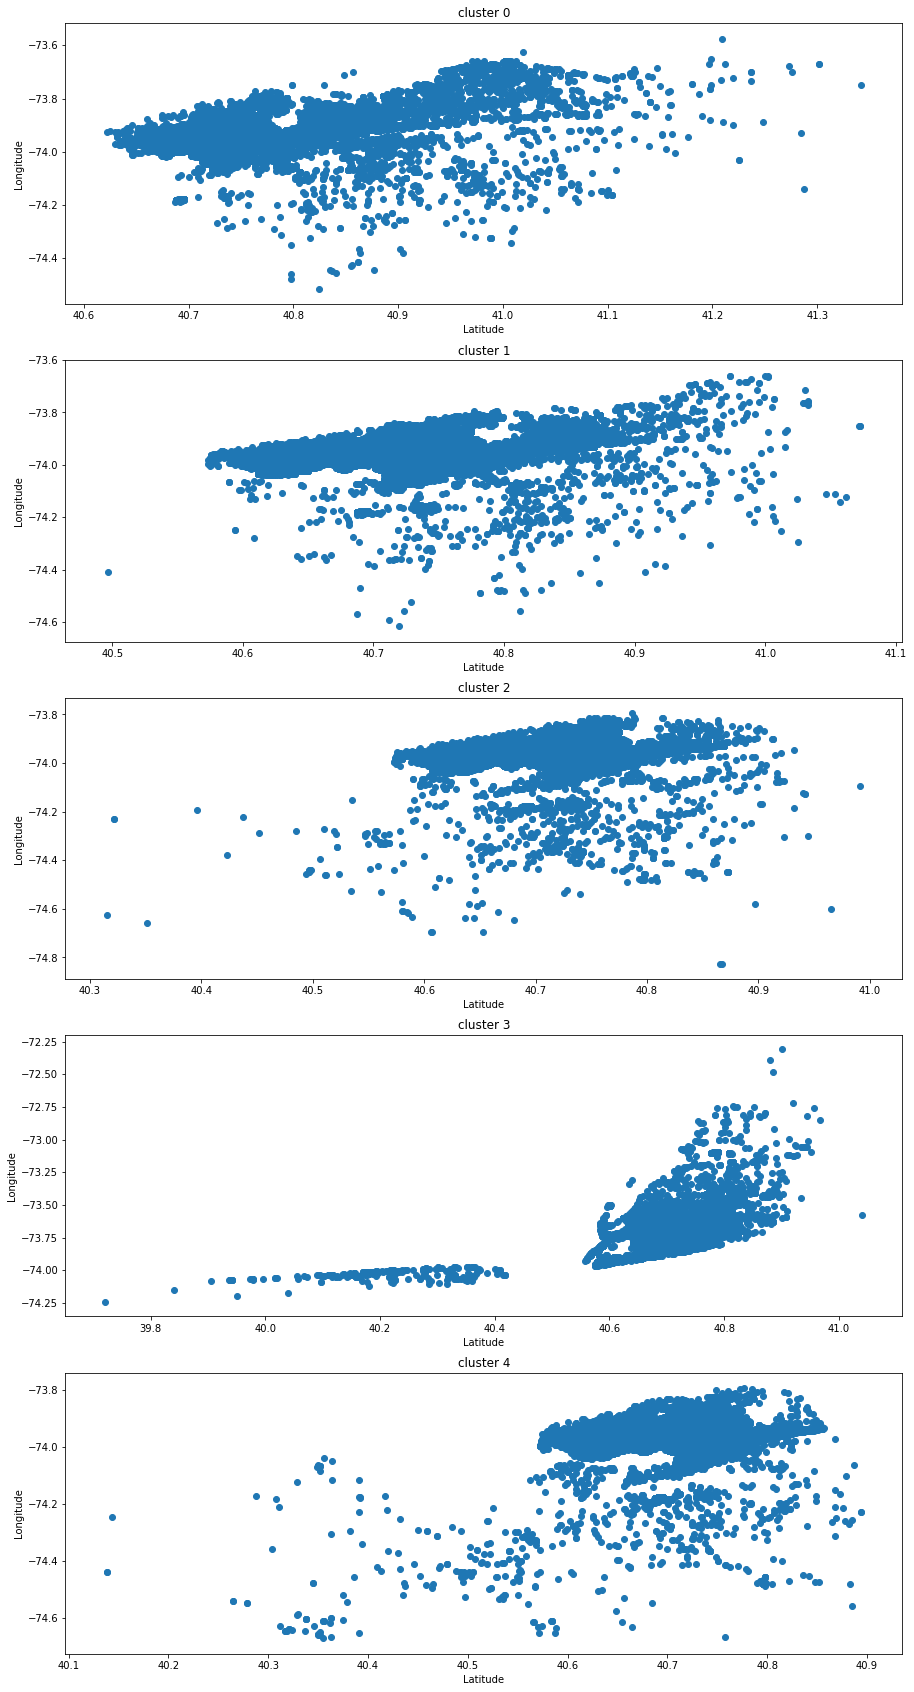

In [193]:
# Visualizing the clusters on Long + Lat
fig, axs = plt.subplots(5, 1,figsize=(15,30))
for clus in range(5):
  axs[clus].scatter(X[X['clust'] == clus].Lat, X[X['clust'] == clus].Lon)
  axs[clus].set_title('cluster '+str(clus))
  axs[clus].set_xlabel('Latitude')
  axs[clus].set_ylabel('Longitude')
plt.show()